### Clustering의 종류(크게 3가지)
- K-menas : 데이터를 사용자가 지정한 k개의 군집으로 나눕니다.
- Hierarchical(계층적 군집분석) : 나무 모양의 계층구조를 형성해 나가는 방법으로 군집을 나눕니다.
- DBSCAN : k개를 설정할 필요없이 군집화할 수 있는 방법으로 군집을 나눕니다.

### K-means
#### 각 군집에 할당된 포인트들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트합니다.
1. 각 데이터 포인트에 i에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집을 할당합니다.
2. 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들의 좌표의 평균(mean)으로 합니다.
3. 각 클러스터의 할당이 바뀌지 않을 때까지 반복합니다.

### K-medoids
1. 각 데이터 포인트 i에 대해 가장 가까운 중심을 찾고, 그 중심점에 해당하는 군집을 할당합니다.
2. 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들의 최대값, 최소값을 시준으로 정합니다.
3. 각 클러스터의 할당이 바뀌지 않을 때까지 반복합니다.

### K-means vs K-medoids
1. 중심
- k-means : 군집의 평균값
- k-medoids : 군집 내 중앙 데이터
2. 이상치
- k-means : 이상치가 전체 거리 평균 값에 영향을 주어 이상치에 민감
- k-medoids : k-means 보다는 덜 민감
3. 계산시간
- k-means : 상대적으로 적은 시간이 소요
- k-medoids : 데이터 간 모든 거리 비용을 반복하여 계산해야 하므로 상대적으로 많은 시간이 소요

### Hierarchical(계층적 군집분석)
- 개체들을 가까운 집단부터 순차적/계층적으로 차근차근 묶어나가는 방식입니다.
- 유사한 개체들이 결합되는 dendrogram을 통해 시각화가 가능합니다.
- 사전에 군집의 개수를 정하지 않아도 수행가능합니다.
- 모든 개체들 사이의 거리에 대한 유사도 행렬 계산을 합니다.
- 거리가 인접한 관측치끼리 cluster를 형성합니다.
- 유사도 행렬을 업데이트합니다.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [4]:
X = np.array([
    [5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],
])

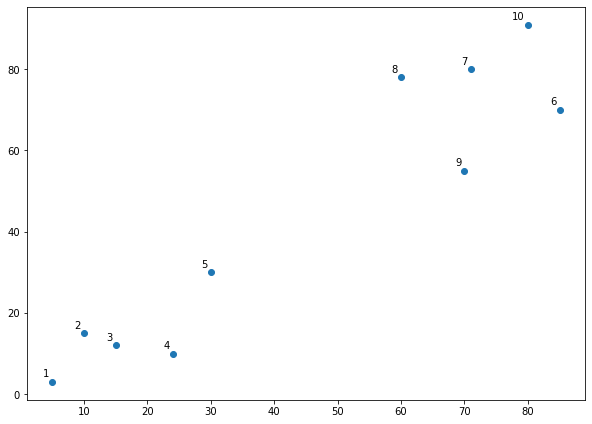

In [5]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label='True Position')

# for loop를 사용하다보면 인덱스가 동시에 반복하고 싶은 경우가 있는데,
# 이때 zip함수를 사용하면 동시에 인덱스를 반복할 수 있습니다.
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
    label,
    xy=(x,y), xytext=(-3,3),
    textcoords='offset points', ha='right', va='bottom'
    )
plt.show()

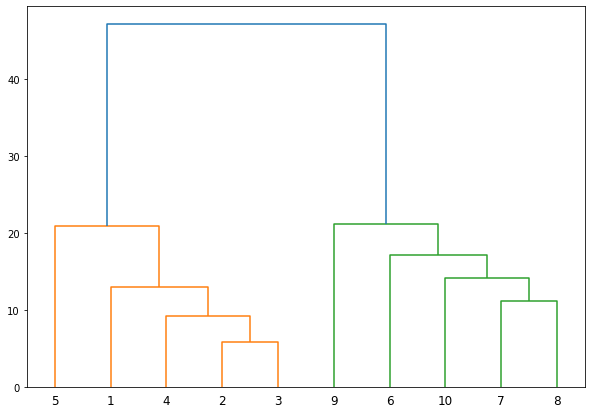

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
labelList = range(1,11)
plt.figure(figsize=(10,7))

dendrogram(linked,
          orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True
          )
plt.show()

In [7]:
customer_data = pd.read_csv('shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


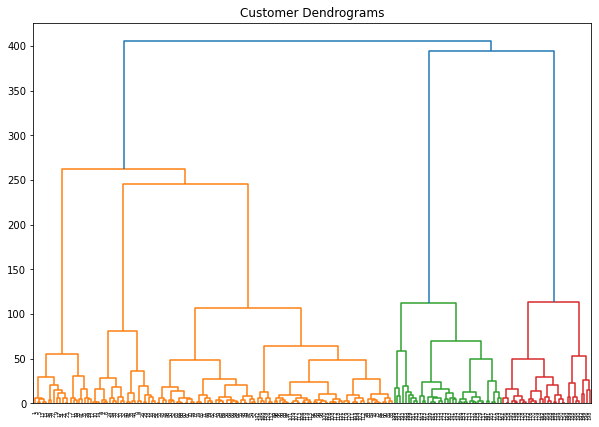

In [10]:
import scipy.cluster.hierarchy as sch
data = customer_data.iloc[:, 3:5].values
plt.figure(figsize=(10,7))
plt.title('Customer Dendrograms')
dend = sch.dendrogram(sch.linkage(data, method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

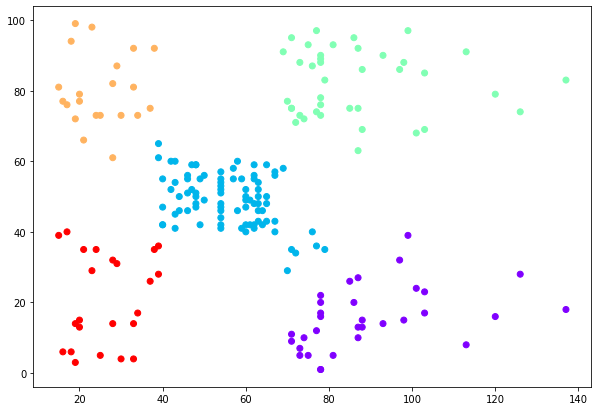

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### 최적의 k를 찾는 방법
- 군집의 개수 k는 사용자가 임의로 정하는 것이기 때문에 데이터에 최적화된 k를 찾기는 어렵습니다.
- k를 설정하는 대표적인 방법은 Elbow method가 있습니다.
- Elbow Method (군집 간 분산과 전체 분산의 비율)

### DBSCAN
#### K-means 클러스터링의 단점
- 초기 중심값에 민감한 반응을 보입니다.
- 노이즈와 아웃라이어에 민감합니다.
- 군집의 개수 k를 설정하는 것에 어려움이 있습니다.

### DBSCAN의 특징
- 2014년 KDD학회에서 상을 받은 알고리즘으로, density-based clustering 중 가장 유명하고 성능이 우수하다고 알려져 있습니다.
- DBSCAN의 특징은 eps-neighbors와 MinPTS를 사용하여 군집을 구성합니다.
- MinPts : 한 군집은 MinPts보다 많거나 같은 수의 데이터로 구성됩니다. 만약 MinPts보다 적은 수의 데이터가 eps-neighbors를 형성하면 노이즈로 취급합니다.

### DBSCAN의 장단점
#### 장점
- K-means와 다르게 군집의 수를 설정할 필요가 없습니다.
- 다양한 모양의 군집이 형성될 수 있으며, 군집끼리 겹치는 경우가 없습니다.
- 노이즈 개념 덕분에 이상치에 대응이 가능합니다.
- 설정할 파라미터 두개(eps, minPts)로 적으며, 적용 분야에 대한 사전 지식이 있는 경우 비교적 쉽게 설정이 가능합니다.

#### 단점
- 한 데이터는 하나의 군집에 속하게 되므로, 시작점에 따라 다른 모양의 군집이 형성됩니다.
- Eps의 크기에 의해 DBSCAN의 성능이 크게 좌우됩니다.
- 군집별로 밀도가 다른 경우 DBSCAN을 이용하면 군집화가 제대로 이루어지지 않을 수 있습니다.


#### DBSCAN의 파라미터 : MinPts, eps
1. MinPts
- MinPts = 변수의 수 + 1
- MinPts는 3이상으로 설정합니다. (1인 경우 데이터가 하나하나가 다 개별 군집으로 형성)
2. Eps
- 너무 작은 경우, 상당 수의 데이터가 노이즈로 구분될 수 있습니다.
- 너무 큰 경우, 군집의 수가 하나가 될 가능성이 있습니다.
- 일반적으로 K-nearest neighbor graph의 distances를 그래프로 나타낸 후 거리가 급격하게 증가하는 지점을 eps로 설정합니다.

In [22]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis = 1) # 0: 위아래로 데이터 합치기, 1: 왼쪽오른쪽 데이터 합치기
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
feature = data[ ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

model = DBSCAN(eps=0.5, min_samples=5) # 파라미터 값에 따라 데이터 달라질 수 있음
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)
print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


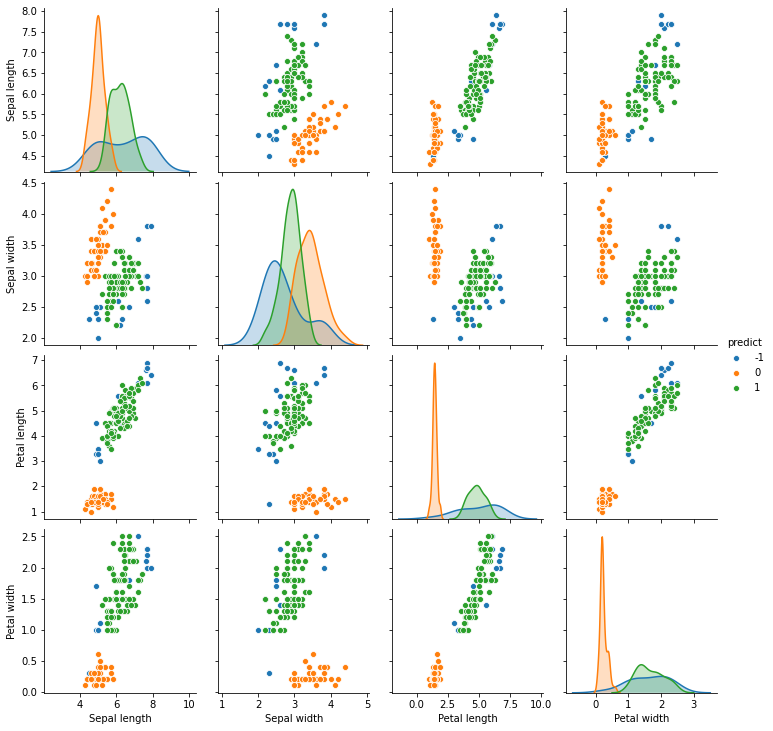

In [28]:
# 예측 데이터 시각화
sns.pairplot(r, hue='predict')
plt.show()

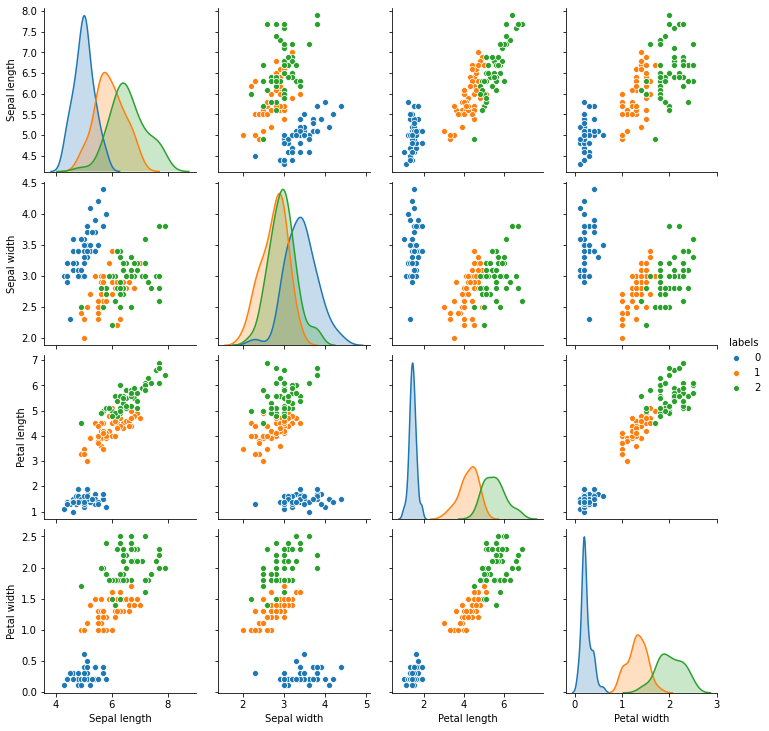

In [27]:
# 실제 데이터 시각화
sns.pairplot(data, hue='labels')
plt.show()